In [ ]:
%%capture
%run ./code.ipynb

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [ ]:
randomForestRegressor = RandomForestRegressor(n_estimators=300,random_state=40,n_jobs=-1)

In [ ]:
rfr_model = randomForestRegressor.fit(X_train, y_train)

In [ ]:
pred = rfr_model.predict(X_test)
result = pd.DataFrame({'pred_price': pred.astype(np.float64)})

In [ ]:
pred_price = result
test_price = pd.DataFrame({'Test data price': y_test})
pred_test_price = pred_price.assign(test_price=test_price)
pred_test_price

,pred_price,test_price
0,17091.226667,17290
1,11613.006667,11298
2,11787.943333,11599
3,16940.140000,16790
4,25337.870000,27989
...,...,...
4097,20404.560913,18450
4098,14789.726667,13490
4099,13674.433333,12799
4100,32059.466667,33450


<Figure size 432x288 with 0 Axes>

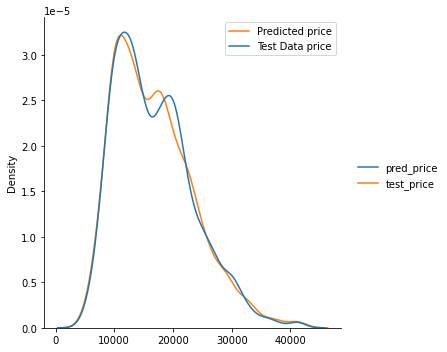

In [ ]:
plt.figure()
# pred_test_price.plot(kind='kde')
sns.displot(data=pred_test_price,kind='kde')
plt.legend((u'Predicted price', u'Test Data price'))
plt.show()

In [ ]:
rfr_model.score(X_train, y_train)

0.9928332465614477

In [ ]:
rfr_model.score(X_test, y_test)

0.9515025338803464